In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

housing = pd.read_csv('s3://rmit-ml-2020s1-lab-data/BostonHousingPrice/housing.data.csv', delimiter='\s+')
Y = housing['MEDV']
X = housing.drop('MEDV', axis=1)

In [20]:
from sklearn import model_selection
number_splits = 10
kFold = model_selection.KFold(n_splits=number_splits, shuffle=True)

In [21]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(np.array(X), np.array(Y), test_size=0.2)
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

from sklearn.preprocessing import PolynomialFeatures
polyFeat = PolynomialFeatures(degree=4, include_bias=True)
polyTrainX = polyFeat.fit_transform(trainX)
polyTestX = polyFeat.fit_transform(testX)

linReg.fit(polyTrainX,trainY)
pred = linReg.predict(polyTestX)
print('Mean squared error ', mean_squared_error(testY, pred))

(404, 13)
(102, 13)
(404,)
(102,)
Mean squared error  162082.22876952562


In [22]:
#We use the following regularisation weights to evaluate which weight is best for the polynomial regression model.
lRegPara = np.linspace(0.001,.5,num=20)
# You may also use fixed set of values
# lRegPara = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1]

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/coordin

Text(0, 0.5, 'Average MSE')

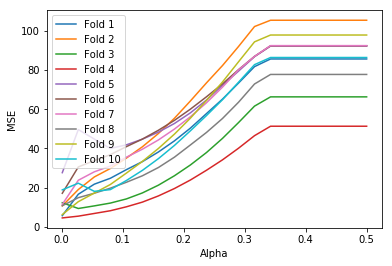

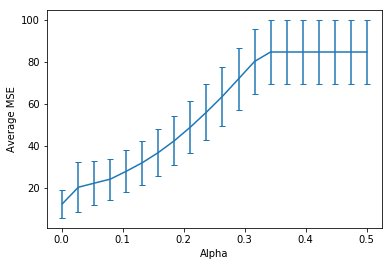

In [24]:
#The following code:
## For each k-fold splits, gets the training and testing data for that split
## Then iterates through each regularisation parameter
## For each fold-parameter pairing, a regularised polynomial is trained
## The model is evaluated using the MSE
## These average and std dev of MSE’s are plotted.

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
plt.figure()
lResults = np.zeros((number_splits,len(lRegPara)))
nsplit = 0
for trainIndex, validIndex in kFold.split(X):
    # Get the training and validation data
    trainX = np.array(X.loc[trainIndex])
    trainY = np.array(Y.loc[trainIndex])
    validX = np.array(X.loc[validIndex])
    validY = np.array(Y.loc[validIndex])

    # This is where you're polynomial model is used!
    polyFitTrainX = polyFeat.fit_transform(trainX)
    polyFitValidX = polyFeat.fit_transform(validX)

    for j , regPara in enumerate(lRegPara):
        polyRidgeReg = linear_model.Lasso(alpha=regPara, normalize=True)
        polyRidgeReg.fit(polyFitTrainX, trainY)
        predY = polyRidgeReg.predict(polyFitValidX)
        mse = mean_squared_error(validY, predY)
        lResults[nsplit, j] = (mse)

    plt.plot(lRegPara, lResults[nsplit, :], label='Fold '+str(nsplit+1))
    nsplit = nsplit + 1

plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.legend()

plt.figure()
plt.errorbar(lRegPara, np.mean(lResults,axis=0), yerr=np.std(lResults,axis=0),capsize=3)
plt.xlabel("Alpha")
plt.ylabel("Average MSE")

0 ,  0.001
1 ,  0.027263157894736843
2 ,  0.053526315789473686
3 ,  0.07978947368421052
4 ,  0.10605263157894737
5 ,  0.13231578947368422
6 ,  0.15857894736842104
7 ,  0.1848421052631579
8 ,  0.21110526315789474
9 ,  0.2373684210526316
10 ,  0.26363157894736844
11 ,  0.28989473684210526
12 ,  0.3161578947368421
13 ,  0.34242105263157896
14 ,  0.3686842105263158
15 ,  0.39494736842105266
16 ,  0.4212105263157895
17 ,  0.4474736842105263
18 ,  0.4737368421052632
19 ,  0.5
0 ,  0.001
1 ,  0.027263157894736843
2 ,  0.053526315789473686
3 ,  0.07978947368421052
4 ,  0.10605263157894737
5 ,  0.13231578947368422
6 ,  0.15857894736842104
7 ,  0.1848421052631579
8 ,  0.21110526315789474
9 ,  0.2373684210526316
10 ,  0.26363157894736844
11 ,  0.28989473684210526
12 ,  0.3161578947368421
13 ,  0.34242105263157896
14 ,  0.3686842105263158
15 ,  0.39494736842105266
16 ,  0.4212105263157895
17 ,  0.4474736842105263
18 ,  0.4737368421052632
19 ,  0.5
0 ,  0.001
1 ,  0.027263157894736843
2 ,  0.053526

Text(0, 0.5, 'Average MSE')

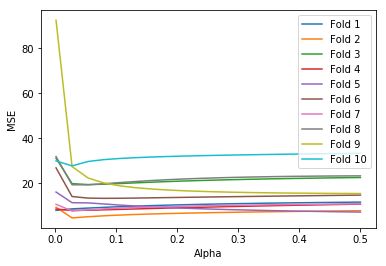

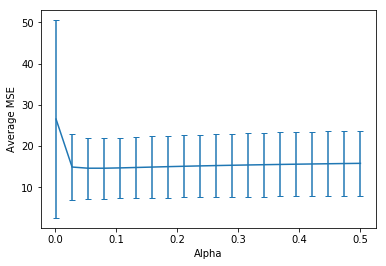

In [27]:
#The following code:
## For each k-fold splits, gets the training and testing data for that split
## Then iterates through each regularisation parameter
## For each fold-parameter pairing, a regularised polynomial is trained
## The model is evaluated using the MSE
## These average and std dev of MSE’s are plotted.

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
plt.figure()
lResults = np.zeros((number_splits,len(lRegPara)))
nsplit = 0
for trainIndex, validIndex in kFold.split(X):
    # Get the training and validation data
    trainX = np.array(X.loc[trainIndex])
    trainY = np.array(Y.loc[trainIndex])
    validX = np.array(X.loc[validIndex])
    validY = np.array(Y.loc[validIndex])

    # This is where you're polynomial model is used!
    polyFitTrainX = polyFeat.fit_transform(trainX)
    polyFitValidX = polyFeat.fit_transform(validX)

    for j , regPara in enumerate(lRegPara):
        print(j, ", ", regPara)
        polyRidgeReg = linear_model.Ridge(alpha=regPara, normalize=True)
        polyRidgeReg.fit(polyFitTrainX, trainY)
        predY = polyRidgeReg.predict(polyFitValidX)
        mse = mean_squared_error(validY, predY)
        lResults[nsplit, j] = (mse)

    plt.plot(lRegPara, lResults[nsplit, :], label='Fold '+str(nsplit+1))
    nsplit = nsplit + 1

plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.legend()

plt.figure()
plt.errorbar(lRegPara, np.mean(lResults,axis=0), yerr=np.std(lResults,axis=0),capsize=3)
plt.xlabel("Alpha")
plt.ylabel("Average MSE")